In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Support Vector Machines

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data / 16., digits.target % 2, random_state=2)

In [4]:
from sklearn.svm import LinearSVC, SVC
linear_svc = LinearSVC(loss="hinge").fit(X_train, y_train)
svc = SVC(kernel="linear").fit(X_train, y_train)

In [5]:
np.mean(linear_svc.predict(X_test) == svc.predict(X_test))

1.0

## Kernel SVMs


Predictions in a kernel-SVM are made using the formular

$$
\hat{y} = \alpha_0 + \alpha_1 y_1 k(\mathbf{x^{(1)}}, \mathbf{x}) + ... + \alpha_n y_n k(\mathbf{x^{(n)}}, \mathbf{x})> 0
$$

$$
0 \leq \alpha_i \leq C
$$



Radial basis function (Gaussian) kernel:
$$k(\mathbf{x}, \mathbf{x'}) = \exp(-\gamma ||\mathbf{x} - \mathbf{x'}||^2)$$

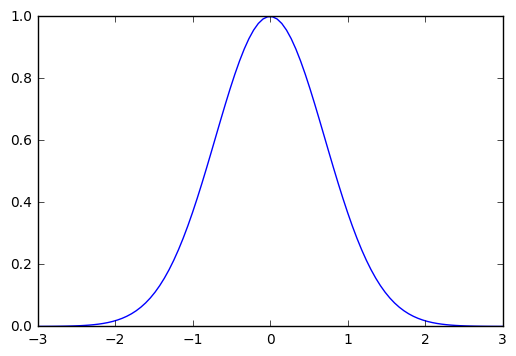

In [6]:
from sklearn.metrics.pairwise import rbf_kernel
line = np.linspace(-3, 3, 100)[:, np.newaxis]
kernel_value = rbf_kernel([[0]], line, gamma=1)
plt.plot(line, kernel_value.T)

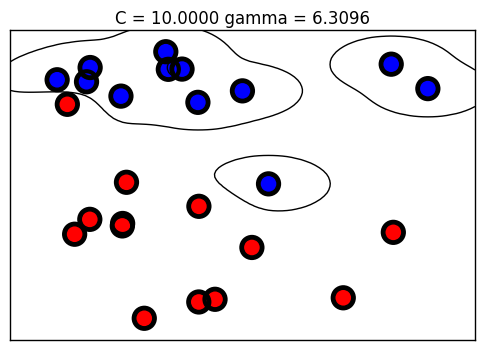

In [7]:
from figures import plot_svm_interactive
plot_svm_interactive()

In [8]:
svc = SVC().fit(X_train, y_train)
svc.score(X_test, y_test)

0.9177777777777778

In [10]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10, 100]

from sklearn.model_selection import GridSearchCV

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [11]:
grid_search.score(X_test, y_test)

0.98666666666666669

//anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


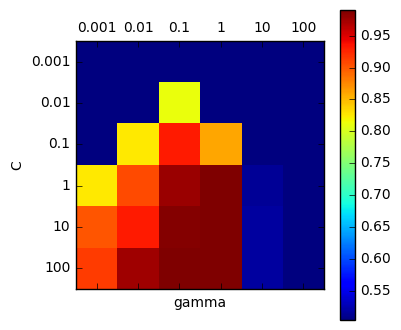

In [17]:
# We extract just the scores
scores = [x[1] for x in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 6)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(6), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);